# Contents
1. Importing libraries
2. Setting up dataframes
3. Developing a hypothesis and criteria for testing
4. Cleaning and wrangling data
5. Preparing data for a regression analysis
6. Regression Analysis
7. Insights
8. Saving main dataset  

### 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

### 2. Setting up dataframes

In [3]:
# Defining the main project path
proj = r'C:\Users\bfd_6\Documents\Career Foundry Project\Course Part 2\A6 Adv Analytics and Dashboards\Real Estate Project'

In [4]:
# Creating a data frame for the main real estate dataset
df_re = pd.read_pickle(os.path.join(proj, '02 Data', 'Prepared Data', 're_merged.pkl'))

In [5]:
# I want to see all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df_re.head(3)

,geo_id,us_county,2022 total housing units,2022 occupied housing units,2022 vacant housing units,2022 num_units -1_detached,2022 num_units-1_attached,2022 2 units,2022 3-4 units,2022 5-9 units,2022 10-19 units,2022 20+ units,2022 mobile home,2022 boat_rv_van_etc,2022 built 2020+,2022 built 2010-2019,2022 built 2000-2009,2022 built 1990-1999,2022 built 1980-1989,2022 built 1970-1979,2022 built 1960-1969,2022 built 1950-1959,2022 built 1940-1949,2022 built before 1940,2022 1 room,2022 2 rooms,2022 3 rooms,2022 4 rooms,2022 5 rooms,2022 6 rooms,2022 7 rooms,2022 8 rooms,2022 9+ rooms,2022 no bedroom,2022 1 bedroom,2022 2 bedrooms,2022 3 bedrooms,2022 4 bedrooms,2022 5+ bedrooms,2022 owner-occupied,2022 renter-occupied,2022 move-in 2021+,2022 move-in 2018-2020,2022 move-in 2010-2017,2022 move-in 2000-2009,2022 move-in 1990-1999,2022 move-in before 1990,2022 no vehicles available,2022 1 vehicle available,2022 2 vehicles available,2022 3+ vehicles available,2022 gas heat,2022 lp container heat,2022 electric heat,2022 oil or kerosene heat,2022 coal or coke heat,2022 wood heat,2022 solar heat,2022 other fuel heat,2022 no fuel heat,2022 no full bathroom,2022 no full kitchen,2022 no landline available,2022 1.00 or less occ per room,2022 1.01 to 1.50 occ per room,2022 1.51 or more occ per room,2022 own_occ < $50k,2022 own_occ $50k < $100k,2022 own_occ $100k < $150k,2022 own_occ $150k < $200k,2022 own_occ $200k <$300k,2022 own_occ $300k - $500k,2022 own_occ $500k - $1m,2022 own_occ $1m+,2022 mortgage,2022 no mortgage,2022 rent producing units,2022 gross rent < $500,2022 gross rent $500 < $1k,2022 gross rent $1k < $1.5k,2022 gross rent $1.5k < $2k,2022 gross rent $2k <$2.5k,2022 gross rent $2.5k <$3k,2022 gross rent $3k+,2022 no rent paid,2012 total housing units,2012 occupied housing units,2012 vacant housing units,2012 num_units -1_detached,2012 num units-1_attached,2012 2 units,2012 3-4 units,2012 5-9 units,2012 10-19 units,2012 20+ units,2012 mobile home,2012 boat_rv_van_etc,2012 built 2010+,2012 built 2000-2009,2012 built 1990-1999,2012 built 1980 -1989,2012 built 1970-1979,2012 built 1960-1969,2012 built 1950-1959,2012 built 1940-1949,2012 built before 1940,2012 1 room,2012 2 rooms,2012 3 rooms,2012 4 rooms,2012 5 rooms,2012 6 rooms,2012 7 rooms,2012 8 rooms,2012 9 rooms+,2012 no bedroom,2012 1 bedroom,2012 2 bedrooms,2012 3 bedrooms,2012 4 bedrooms,2012 5 bedrooms+,2012 owner-occupied,2012 renter-occupied,2012 moved in 2010+,2012 moved in 2000-2009,2012 moved in 1990-1999,2012 moved in 1980-1989,2012 moved in 1970 to 1979,2012 moved before 1970,2012 no vehicles available,2012 1 vehicle available,2012 2 vehicles available,2012 3+ vehicles available,2012 gas heat,2012 lp container heat,2012 electric heat,2012 oil or kerosene heat,2012 coal or coke heat,2012 wood heat,2012 solar heat,2012 other fuel heat,2012 no fuel heat,2012 no full bathroom,2012 no full kitchen,2012 no landline available,2012 1.00 or less occ per room,2012 1.01 to 1.50 occ per room,2012 1.51 or more occ per room,"2012 own_occ < $50,000","2012 own_occ $50,000 < $99,999","2012 own_occ $100,000 < $149,999","2012 own_occ $150,000 < $199,999","2012 own_occ $200,000 < $299,999","2012 own_occ $300,000 < $499,999","2012 own_occ $500,000 < $999,999","2012 own_occ $1,000,000+",2012 mortgage,2012 no mortgage,2012 rent producing units,2012 gross rent less than $200,2012 gross rent $200 < $299,2012 gross rent $300 < $499,2012 gross rent $500 < $749,2012 gross rent $750 < $999,"2012 gross rent $1,000 < $1,499","2012 gross rent $1,500+",2012 no rent paid,county,state,st_abbr,region,2022 move-in 2010-2020,2012 move-in before 1980,2022 households,2012 households,2012 ami % usmi,2022 ami % usmi,2022 median income,2012 median income,2012 aff rent,2012 aff purch,2022 aff rent,2022 aff purch,change in units %,fips,coty_gnis_code,2012_income_level,2022_income_level
0,0500000US01001,"Autauga County, Alabama",24457,22308,2149,18370,273,145,294,510,500,470,3805,90,169,3110,5180,4704,2696,45

### 3. Developing a hypothesis and criteria for testing

#### Hypothesis:
As median income increases for a county, the percentage of owner occupied units will also increase.

In [7]:
# Creating a column for owner occupied units as a percentage of total occupied units
df_re['own_pct_22'] = df_re['2022 owner-occupied'] / df_re['2022 occupied housing units']
df_re['own_pct_12'] = df_re['2012 owner-occupied'] / df_re['2012 occupied housing units']

### 4. Cleaning and wrangling data

In [8]:
# Creating a subset for regression analysis
df_regr_12 = df_re[['2012 median income', 'own_pct_12']]

In [9]:
df_regr_12.head(2)

,2012 median income,own_pct_12
0,53773,0.776964
1,50706,0.740732


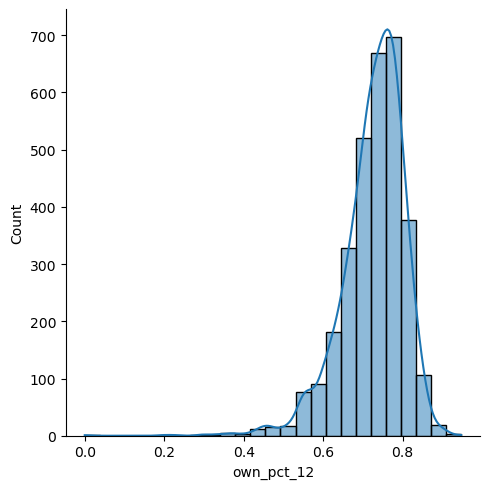

In [10]:
# Checking for extreme values in percentage of owner occupied units
sns.displot(df_regr_12['own_pct_12'], bins=25, kde=True) 
# sns.displot(df_regr_12['2012 median income'], bins=25, kde=True) 

#### Obtaining some statistical information and determining where the outliers are.

In [11]:
print(df_regr_12['own_pct_12'].min())
print(df_regr_12['own_pct_12'].mean())
print(df_regr_12['own_pct_12'].median())
print(df_regr_12['own_pct_12'].max())
print(df_regr_12['2012 median income'].min())
print(df_regr_12['2012 median income'].mean())
print(df_regr_12['2012 median income'].median())
print(df_regr_12['2012 median income'].max())

0.0
0.7259085464989425
0.7385340762966138
0.9472539423599783
19624
45581.582614253755
43817.0
122844


In [12]:
print(df_re['2012 owner-occupied'].min())
print(df_re['2012 owner-occupied'].mean())
print(df_re['2012 owner-occupied'].median())
print(df_re['2012 owner-occupied'].max())

0
23809.061361457334
7162.0
1523331


In [13]:
condition = df_re['own_pct_12'] < 0.2
selected_rows = df_re.loc[condition == True]
#print(selected_rows)

In [14]:
print(selected_rows[['geo_id', 'us_county', '2012 occupied housing units', '2012 owner-occupied']])

              geo_id               us_county  2012 occupied housing units  \
537   0500000US15005  Kalawao County, Hawaii                           48   
1818  0500000US36005  Bronx County, New York                       473281   

      2012 owner-occupied  
537                     0  
1818                94130  


In [15]:
condition.value_counts()

own_pct_12
False    3127
True        2
Name: count, dtype: int64

In [16]:
# Creating a subset for regression analysis
df_regr_22 = df_re[['2022 median income', 'own_pct_22']]

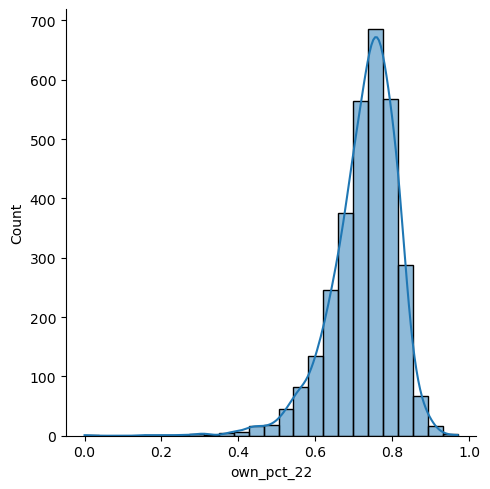

In [17]:
# Checking for extreme values in percentage of owner occupied units
sns.displot(df_regr_22['own_pct_22'], bins=25, kde=True) 

In [18]:
print(df_regr_22['own_pct_22'].min())
print(df_regr_22['own_pct_22'].mean())
print(df_regr_22['own_pct_22'].median())
print(df_regr_22['own_pct_22'].max())
print(df_regr_22['2022 median income'].min())
print(df_regr_22['2022 median income'].mean())
print(df_regr_22['2022 median income'].median())
print(df_regr_22['2022 median income'].max())

0.0
0.7273798551547372
0.740625
0.9698581560283688
17900
63237.352508788754
60836.0
170463


I found some very small values (including zero) for owner-occupied units for both 2012 and 2022. The numbers are valid. The
situations surrounding the counties are unusual. For example, the zero value is for Kalawao County, HI, which has the second 
lowest population in the US. More information can be found on the [wiki](https://en.wikipedia.org/wiki/Kalawao_County,_Hawaii)
The resident population is mostly federal preservation and state health workers. 

I decided to drop the data for Kalawao County due to the uniqueness and small number of total residents.

In [19]:
# Dropping the Kalawao County data. 
# Using a new dataframe keeps the changes away from the main dataframe
df_re_test = df_re.loc[df_re['us_county'] != "Kalawao County, Hawaii"]

In [20]:
# Checking that the data for Kalawao County was not included in the new dataframe.
# I'm using the same variable I used earlier for this purpose to keep the code and memory cleaner.
condition = df_re_test['own_pct_12'] <= 0.2
selected_rows = df_re_test.loc[condition == True]

In [21]:
print(selected_rows[['geo_id', 'us_county', '2012 owner-occupied']])

              geo_id               us_county  2012 owner-occupied
1818  0500000US36005  Bronx County, New York                94130


In [22]:
# Creating a subset for regression analysis
df_rg_12 = df_re_test[['2012 median income', 'own_pct_12']]

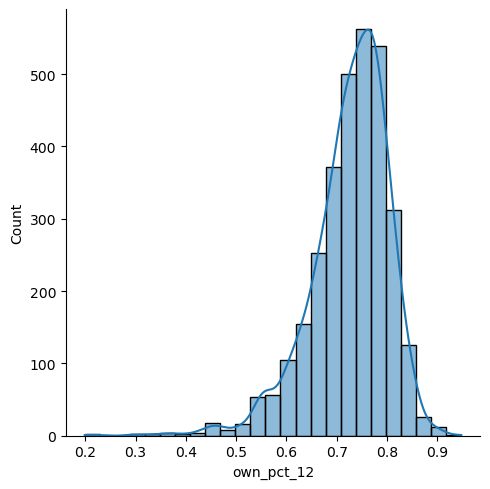

In [23]:
# Checking for extreme values in percentage of owner occupied units
sns.displot(df_rg_12['own_pct_12'], bins=25, kde=True) 

### 5. Preparing data for regression analysis

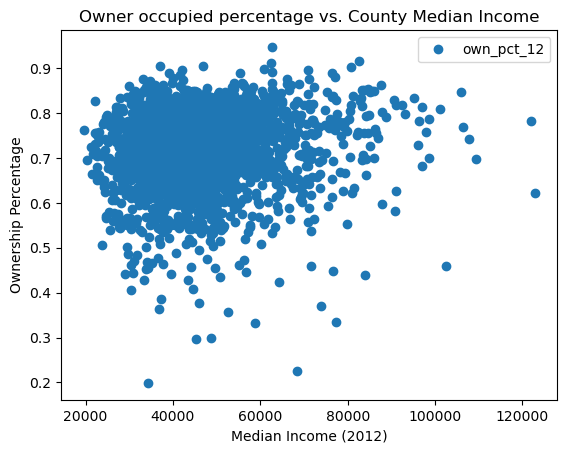

In [24]:
# Create a scatterplot for a different perspective on how the chosen data interacts.

df_rg_12.plot(x = '2012 median income', y='own_pct_12',style='o') 
plt.title('Owner occupied percentage vs. County Median Income')  
plt.xlabel('Median Income (2012)')  
plt.ylabel('Ownership Percentage')  
plt.show()

In [25]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_rg_12['2012 median income'].values.reshape(-1,1)
y = df_rg_12['own_pct_12'].values.reshape(-1,1)

In [26]:
X

array([[53773],
       [50706],
       [31889],
       ...,
       [59714],
       [44519],
       [53802]], dtype=int64)

In [27]:
y

array([[0.77696398],
       [0.74073209],
       [0.66698504],
       ...,
       [0.74520624],
       [0.69380634],
       [0.78769439]])

In [29]:
# Splitting data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 6. Regression Analysis

In [30]:
# Creating a regression object.
regression = LinearRegression()  

In [31]:
# Fitting the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predicting the values of y using X.
y_predicted = regression.predict(X_test)

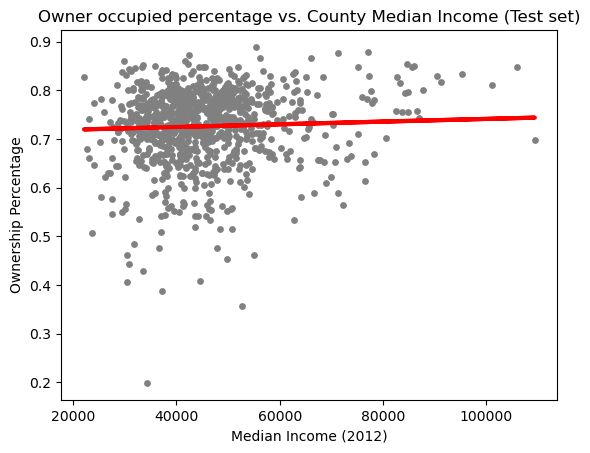

In [33]:
# Creating a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Owner occupied percentage vs. County Median Income (Test set)')
plot_test.xlabel('Median Income (2012)')
plot_test.ylabel('Ownership Percentage')
plot_test.show()

The regression line appears to have little resemblance the general appearance of the data. It does not appear that median income has a strong
relationship with ownership percentage in counties with a median income below 80k usd per year. However, after 80k the relationship becomes much stronger. Although the hypothesis was not entirely disproved since the relationship is positive, I do not believe that median income is a reliable predictor of percentage of ownership percentage for a given county. 

#### Performing the regression on the training set.

In [38]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.850547,0.723340
1,0.621261,0.721741
2,0.605997,0.725939
3,0.460916,0.721853
4,0.712657,0.728928
5,0.750690,0.724719
6,0.779974,0.726093
7,0.837599,0.730820
8,0.674616,0.726269
9,0.708913,0.725485


In [34]:
# Prediction.
y_predicted_train = regression.predict(X_train) 

In [35]:
# Obtaining the mean squared error and R2 score.
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [36]:
# Printing out some descriptive information for the regression.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.76387953e-07]]
Mean squared error:  0.006150773547450219
R2 score:  0.001738818274914733


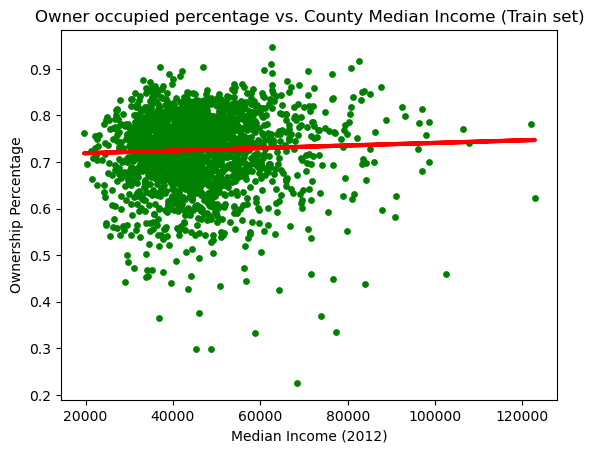

In [37]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Owner occupied percentage vs. County Median Income (Train set)')
plot_test.xlabel('Median Income (2012)')
plot_test.ylabel('Ownership Percentage')
plot_test.show()

### 7. Insights

The model performed on the test and train sets similarly. The MSE is a very low number, indicating that the regression line passes directly through several data points in the train set. However, when the predicted values are compared to the actual values it becomes clear that most values differ from the predicted value; some by a considerable amount. It appears that the cluster of values is roughly regular in shape and that the regression line bisects the cluster. 

This is borne out by the value of R2, which is very low. R2 is a score based on being close to 1.00. The R2 for the regression is less than 0.002 which indicates a very poor fit. 

The data appears to have oulier bias; however, the outliers are valid data. Further, elimination of the outliers would have very little impact on the regression analysis since the bulk of the data forms a cluster. It appears that the relationship between median income and ownership percentage is too weak to provide reasonable predictions. 

### 8. Saving main dataset

In [39]:
# Exporting pkl file to prepared data folder for the current df_re_merged dataset. This will 
# be picked up in the next notebook.
df_re.to_pickle(os.path.join(proj, '02 Data', 'Prepared Data', 're_merged.pkl'))